## Boeing Assignment 

### Applicant: Rodolfo Lerma

### Problem Statement:

Included in the training dataset is information on used cars previously sold. Each row corresponds to one used car listing. The first column of the data contains a unique identifier for the listing. The next twenty-six columns contain information on parameters relevant to the transaction, with those parameters described in more detail in the appendix attached. Finally, the last two columns of the `“Training_dataset.csv”` contain information on `“Vehicle_Trim”` and `“Dealer_Listing_Price”`, which describe the trim of the vehicle involved in the sale, and the price at which the vehicle was listed by the dealer.
Your challenge is to build one or more models, through whatever means you find most appropriate, capable of predicting **vehicle trim** and **dealer listing price** given the other twenty six variables provided.

**Instructions:**

- Model the problem using whatever means you consider best. Your work is expected to be entirely your own. You may consult any resource or reference of your choosing to aide in solving the problem, but the work must be entirely yours. Please reference any resources you use in the write-up covered in step 5.


- If you use a software package to assist you, please include ALL of your original source code in its entirety, and submit it to us EXACTLY following the instructions in Steps 5 and 6. Please also include information about which package you used and why in your brief problem write-up.


- Do not use or add data from any third-party sources, such as internet car estimating tools, to the data provided. At your discretion, some or all of the provided data in `“Training_dataset.csv”` may be used, omitted or manipulated in any way during modeling, but no additional data may be added from outside sources.


- Once your model is built, use it to make predictions on EACH of the 1,000 vehicle listings included in the `“Test_dataset.csv”` file. Your output should be a comma separated values (.csv) file with one-thousand rows and three columns. The first column should be the `unique identifier` for the listing. The second column should be your predicted value for `vehicle trim`. The third column should be your predicted value for `dealer listing price`.


- Please submit a brief write-up of no more than 500 words describing the approach you selected and why. Please save your response as a PDF if possible. Please copy any source code from Step 2 and paste it as text into an appendix at the end of your write-up.


- Return your submission to us by replying back to the original email before the date and time specified in that email. Please attach the CSV containing your predictions from Step 4 and the PDF containing your write-up and source code from step 5 to the email. It should contain ONLY two attachments: the CSV from step 4 and the PDF from Step 5. Please don’t resubmit any of our original data back in your reply.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Test_df = pd.read_csv('Test_Dataset.csv')
Training_df = pd.read_csv('Training_Dataset.csv')

In [2]:
Training_df.head(3)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0


In [3]:
Training_df.shape

(6298, 29)

It is possible to see that the Training Data Set contains 29 columns and 6298 data points.

In [4]:
Test_df.head(3)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear
0,8622015,Seneca,False,HomeNet Automotive,Lake Keowee Chrysler Dodge Jeep Ram,2.5,59,SC,29678,SUV,...,"1 Owner, Non-Personal Use Reported, Buyback Pr...",143.991262,Cadillac,13625.0,XT5,Good Deal,Thank you for visiting another one of Lake Keo...,Used,8-Speed Automatic,2018
1,8625693,Bedford,False,Inventory Command Center,North Coast Auto Mall,4.7,2116,OH,44146,SUV,...,"1 Owner, Accident(s) Reported, Non-Personal Us...",138.770486,Jeep,42553.0,Grand Cherokee,Good Deal,This 2017 Jeep Grand Cherokee 4dr Limited 4x4 ...,Used,8-Speed Automatic,2017
2,8625750,Webster,False,Jeep Certified Program,Marina Chrysler Dodge Jeep Mitsubishi RAM,3.9,46,NY,14580,SUV,...,"1 Owner, Buyback Protection Eligible",31.951088,Jeep,48951.0,Grand Cherokee,Good Deal,Certified. Brilliant Black Crystal Pearlcoat 2...,Used,8-Speed Automatic,2015


In [5]:
Test_df.shape

(1000, 27)

It is possible to see that the Training Data Set contains 27 columns and 1000 data points.

In [6]:
Training_df.dtypes

ListingID                 int64
SellerCity               object
SellerIsPriv               bool
SellerListSrc            object
SellerName               object
SellerRating            float64
SellerRevCnt              int64
SellerState              object
SellerZip               float64
VehBodystyle             object
VehCertified               bool
VehColorExt              object
VehColorInt              object
VehDriveTrain            object
VehEngine                object
VehFeats                 object
VehFuel                  object
VehHistory               object
VehListdays             float64
VehMake                  object
VehMileage              float64
VehModel                 object
VehPriceLabel            object
VehSellerNotes           object
VehType                  object
VehTransmission          object
VehYear                   int64
Vehicle_Trim             object
Dealer_Listing_Price    float64
dtype: object

In [7]:
numeric_columns = ['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage', 'VehYear']

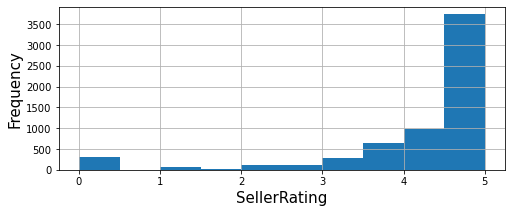

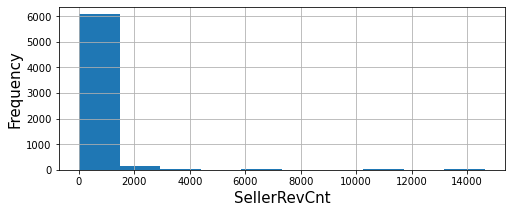

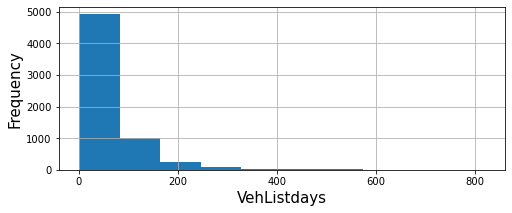

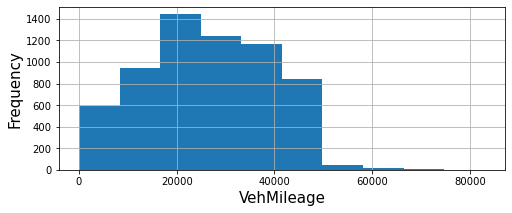

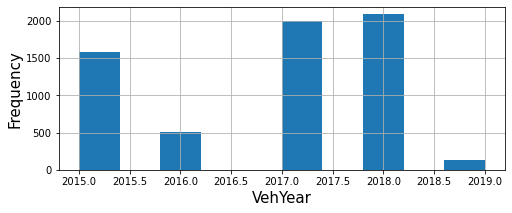

In [8]:
import matplotlib.pyplot as plt

def hist_plot(df,a):
    df[a].hist(figsize = (8,3))
    plt.xlabel(a, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.show()
    
for i in numeric_columns:
    hist_plot(Training_df, i)

### Missing Values

In [9]:
columns = Training_df.columns.to_list()

missing_values = []
my_list = Training_df.columns.values.tolist()
y = Training_df.shape
for i in my_list:
    x = Training_df[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

missing_columns_names = []
for key, value in columns_missing.items():
    if value > 196: 
        x = key
        missing_columns_names.append(x)

In [10]:
print(columns_missing)

{'ListingID': 0, 'SellerCity': 0, 'SellerIsPriv': 0, 'SellerListSrc': 2, 'SellerName': 0, 'SellerRating': 0, 'SellerRevCnt': 0, 'SellerState': 0, 'SellerZip': 2, 'VehBodystyle': 0, 'VehCertified': 0, 'VehColorExt': 73, 'VehColorInt': 728, 'VehDriveTrain': 401, 'VehEngine': 361, 'VehFeats': 275, 'VehFuel': 2, 'VehHistory': 201, 'VehListdays': 2, 'VehMake': 0, 'VehMileage': 2, 'VehModel': 0, 'VehPriceLabel': 285, 'VehSellerNotes': 243, 'VehType': 0, 'VehTransmission': 197, 'VehYear': 0, 'Vehicle_Trim': 405, 'Dealer_Listing_Price': 52}


Looking at the data we can see that there are some columns with more than 10 percent of missing data points.

In [11]:
print('Columns with missing values greater than 200')
print(missing_columns_names)

Columns with missing values greater than 200
['VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehHistory', 'VehPriceLabel', 'VehSellerNotes', 'VehTransmission', 'Vehicle_Trim']


### Distribution of the Target Variable

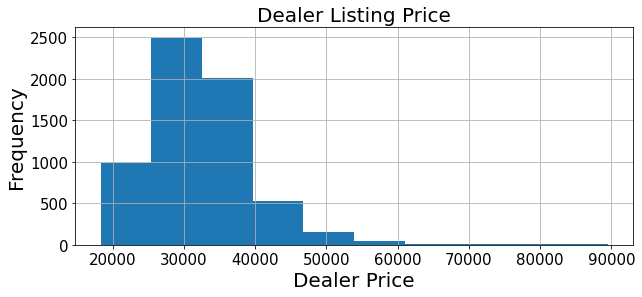

In [12]:
import matplotlib.pyplot as plt
Training_df['Dealer_Listing_Price'].hist(figsize = (10,4))
plt.xlabel('Dealer Price', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Dealer Listing Price', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

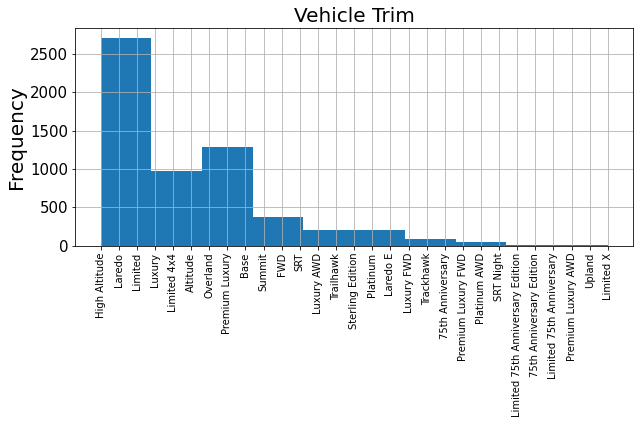

In [13]:
Training_df['Vehicle_Trim'].hist(figsize = (10,4))
#plt.xlabel('Trim', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Vehicle Trim', fontsize = 20)
plt.tick_params(axis="x", labelsize=10, rotation=90)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

In [14]:
boolean_columns = ['SellerIsPriv', 'VehCertified']
for i in boolean_columns:
    Training_df[i] = Training_df[i].astype(int)

Based on the nature of the data some columns will be removed:
- `ListingID`
- `VehSellerNotes`

Need to expand the list:
- `VehHistory`
- `VehFeats`

## Data Formatting

For numerical features with missing values 

In [15]:
data = Training_df.copy()

In [16]:
data.dropna(inplace = True)

In [17]:
data.shape

(5045, 29)

If the missing data is drop we reduce the data set by 20%. This is a possibility.

In [18]:
data.drop(columns=['ListingID', 'VehSellerNotes', 'SellerZip'], inplace = True)

In [19]:
columns_updated = data.columns.to_list()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data[numeric_columns])
data_scaled = scaler.transform(data[numeric_columns])
df1 = pd.DataFrame(data_scaled, columns = numeric_columns)

In [21]:
data.drop(columns = numeric_columns, inplace = True)

In [22]:
#Normalized data

In [23]:
data = data.join(df1)

In [24]:
special_columns = ['VehHistory', 'VehFeats']
targets = ["Vehicle_Trim", "Dealer_Listing_Price"]

In [25]:
data["Vehicle_Trim"] = data["Vehicle_Trim"].astype('category')
data["Vehicle_Trim_cat"] = data["Vehicle_Trim"].cat.codes
data.drop(columns = 'Vehicle_Trim', inplace = True)

In [26]:
categorical_columns = [i for i in columns_updated if i not in numeric_columns]
categorical_columns = [i for i in categorical_columns if i not in boolean_columns]
categorical_columns = [i for i in categorical_columns if i not in special_columns]
categorical_columns = [i for i in categorical_columns if i not in targets]

In [27]:
for i in categorical_columns:
    data[i] = data[i].str.lower()

In [28]:
one_hot = pd.get_dummies(data[categorical_columns])

In [29]:
data = data.join(one_hot)

There are 2 columns with a list of values that might be important for the analysis. For this reason they are going to be split and included as features (One Hot Encoding):
- `VehHistory`
- `VehFeats`

## `VehFeats`

In [30]:
x = pd.Series(data['VehFeats'])
split_df = data['VehFeats'].tolist()
mySeries = pd.Series(split_df) 
x = mySeries[2][1:-1]
letter_list = x.split(",")

In [31]:
list_of_lists = []
for i in range(len(mySeries)):
    x = mySeries[i][1:-1]
    new_string = x.replace(" '", "")
    new_string = new_string.replace("'", "")
    new_string = new_string.replace(",", "_")
    new_string = new_string.replace(";", "_")
    new_string = new_string.lower()
    letter_list = new_string.split("_")
    list_of_lists.append(letter_list)

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer
test = pd.Series(list_of_lists)
mlb = MultiLabelBinarizer()
onehot_VehFeats = pd.DataFrame(mlb.fit_transform(test),
                   columns=mlb.classes_,
                   index=test.index)
data = data.join(onehot_VehFeats)

### `VehHistory`

In [33]:
split_df2 = data['VehHistory'].tolist()
mySeries2 = pd.Series(split_df2) 

In [34]:
list_of_lists2 = []
for i in range(len(mySeries2)):
    w = mySeries2[i]
    letter_list2 = w.split(",")
    list_of_lists2.append(letter_list2)

In [35]:
test2 = pd.Series(list_of_lists2)
mlb2 = MultiLabelBinarizer()
onehot_VehHistory = pd.DataFrame(mlb.fit_transform(test2),
                   columns=mlb.classes_,
                   index=test2.index)
data = data.join(onehot_VehHistory)

### General Structure:

- **Clean the Data:**
    - Missing values: Remove or replace (for median or mode)
    - Split the columns
    - One hot encoding


- **Split into training and validation:**


- **Feature Selection:**
    - Feature selection for 2 models
    - Select the most important variables


- **Select different models and do Cross Validation to select the right hyper parameters:**
    - For 2 models for 2 predictions


- **From there select the best model and get the final model:**
    - For 2 models
  
  
- **Do a final Test Prediction:**
    - For 2 models